# <CENTER> Projeto 08

## <center>Teste de hipóteses

 <center><strong>DESCRIÇÃO DO PROJETO:</strong>


Análise dos dados de uma grande loja online para ajudar aumentar as receitas da empresa, através de uma lista de hipoteses compilada junto com o departamento de marketing.

<strong> Análise do Teste A/B</strong>

## Lista de tarefas:

<strong>Gráficos:</strong>

* Receita Acumulada por Grupo;
* Tamanho Médio Acumulado do Pedido por Grupo;
* Diferença Relativa no Tamanho Médio do Pedido;
* Taxa de Conversão Diária;
* Diferença Relativa na Conversão Cumulativa.

<strong>Estatísticas:</strong>

* Percentis de Pedidos por Usuário;
* Preços dos Pedidos;
* Percentis dos Preços dos Pedidos.

<strong> Significância Estatística:</strong>

* Diferença na Conversão entre Grupos (Dados Brutos),
* Diferença no Tamanho Médio do Pedido entre Grupos (Dados Brutos),
* Diferença na Conversão entre Grupos (Dados Filtrados),
* Diferença no Tamanho Médio do Pedido entre Grupos (Dados Filtrados).

<strong> Decisão:</strong>

* As decisões possíveis são: 1. Pare o teste, considere um dos grupos o líder. 2. Pare o teste, conclua que não há diferença entre os grupos. 3. Continue o teste.

# <center><strong>SUMÁRIO:</strong></center>

1. <strong>Bibliotecas e dados.</strong>
    * 1.1 Importação de bibliotecas.
    * 1.2 Importação dos dados.
    * 1.3 Descrição dos dados.
    
    
2. <strong>Priorizando Hipóteses.</strong>
    * 2.1 Aplicação do framework ICE para priorizar hipóteses. 
    * 2.2 Aplicação do framework RICE para priorizar hipóteses. 
    * 2.3 Alterações que ocorrem em processos de priorização de projetos e iniciativas de acordo com o framework usado. 
    
    
3. <strong>Analise de teste A/B.</strong>
    * 3.1 Gráficos da receita cumulativa diária e o grupo de teste A/B.
    * 3.2 Gráfico do volume médio de compra por grupo.
	* 3.3  Gráfico de diferença relativa para os volumes médios de compras.
	* 3.4  Gráfico de conversão cumulativo.
	* 3.5  Gráfico da diferença relativa para as taxas de conversão cumulativas.
    
    
4.  <strong>Valores Extremos: valores atípicos/anomalias. </strong>
	* 4.1  Distribuição de preços de pedidos.
	* 4.2  Calculo dos percentis.
    * 4.3  Quantidade de pedidos por usuário.
	* 4.4  Calculo dos percentis.
    
    
5.  <strong>Análise Passo a Passo de um Teste A/B.</strong>
    * 5.1  Calculo da significância estatística da diferença na conversão entre os grupos.
    * 5.2  Diferença relativa em volume médio de pedidos entre os grupos.
    * 5.3  Quantidade total de usuários anômalo.
    * 5.4  Calculo da significância estatística das diferenças em conversão entre os grupos, usando dados filtrados.
    * 5.5  Gréficos após retirar outliers.
    
    
6. <strong>Conclusão.</strong>

    

## <center><strong>BIBLIOTECAS E DADOS:</strong>

### Importação de bibliotecas:

In [64]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
import scipy.stats as stats
import math as mth
import plotly.graph_objects as go
%matplotlib inline

### Importação dos dados:

In [65]:
orders = pd.read_csv('orders_us.csv')
hypotheses = pd.read_csv('hypotheses_us.csv', sep=';')
visits = pd.read_csv('visits_us.csv')


### Descrição dos dados:

#### <strong>DF Hypotheses</strong>

* Hypotheses — breves descrições das hipóteses.
* Reach — alcance do usuário, em uma escala de um a dez.
* Impact — impacto nos usuários, em uma escala de um a dez.
* Confidence — confiança na hipótese, em uma escala de um a dez.
* Effort — os recursos necessários para testar uma hipótese, em uma escala de um a dez. Quanto maior o valor de Effort, mais recursos são necessários para o teste.


In [66]:
display(hypotheses)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [67]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


#### <strong>DF Visits:</strong>
*	date — data.
*	group — grupo de teste A/B.
*	visits — o número de visitas na data especificada para o grupo de teste A/B especificado.


In [68]:
visits['date'] = visits['date'].map( lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [69]:
display(visits.head())

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [70]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [71]:
visits.describe()

,date,visits
count,62,62.000000
mean,2019-08-16 00:00:00,607.290323
min,2019-08-01 00:00:00,361.000000
25%,2019-08-08 06:00:00,534.000000
50%,2019-08-16 00:00:00,624.500000
75%,2019-08-23 18:00:00,710.500000
max,2019-08-31 00:00:00,770.000000
std,NaN,114.400560


In [72]:
visits.duplicated().sum()

0

In [73]:
display(visits['date'].min())
display(visits['date'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

<strong>Nota:</strong> Não há valores nulos nem duplicados, as datas estão dentro dos limites estipulados. 

#### <strong>DF Orders :</strong>
*	transactionId — identificador do pedido.
*	visitorId — identificador do usuário que fez o pedido.
*	date — do pedido.
*	revenue — do pedido.
*	group — o grupo de teste A/B ao qual o usuário pertence.


In [74]:
orders['date'] = orders['date'].map( lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [75]:
display(orders.head(5))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [76]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [77]:
orders.describe()

,transactionId,visitorId,date,revenue
count,1.197000e+03,1.197000e+03,1197,1197.000000
mean,2.155621e+09,2.165960e+09,2019-08-15 13:06:46.015037696,131.491646
min,1.062393e+06,5.114589e+06,2019-08-01 00:00:00,5.000000
25%,1.166776e+09,1.111826e+09,2019-08-08 00:00:00,20.800000
50%,2.145194e+09,2.217985e+09,2019-08-15 00:00:00,50.200000
75%,3.237740e+09,3.177606e+09,2019-08-23 00:00:00,130.400000
max,4.293856e+09,4.283872e+09,2019-08-31 00:00:00,19920.400000
std,1.229085e+09,1.236014e+09,NaN,603.004729


In [78]:
orders.duplicated().sum()

0

In [79]:
display(orders['date'].min())
display(orders['date'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

<strong>Nota:</strong> Não há valores nulos nem duplicados, as datas estão dentro dos limites estipulados. 

#### Erro referente ao pré-processamento dos dados:
Ao pré-processar os dados pode haver erros nos conjuntos originais; por exemplo, alguns dos visitantes podem ter entrado no grupo A e no grupo B.

Para solucionar este problema verifiquei se o cliente estava inscrito mais vezes no grupo 'A' ou no 'B', caso estivesse inscrito mais vezes no grupo 'A', todas as entradas, mesmo as 'B' se tornarão 'A', se houverem mais inscrições no grupo 'B', todas elas se tornarão 'B':

<strong>Exemplo:</strong> Como o DF orders estava: (Cliente = 199603092, quatro entradas 'A' e uma 'B'.

In [80]:
orders[orders.visitorId == 199603092 ]

,transactionId,visitorId,date,revenue,group
26,2223239646,199603092,2019-08-15,55.7,A
134,62794304,199603092,2019-08-22,110.3,A
246,437656952,199603092,2019-08-02,55.7,B
823,2971973105,199603092,2019-08-27,45.9,A
1102,1941707234,199603092,2019-08-12,100.0,A


In [81]:
# agrupa as transações por visitorId e group, e conta a quantidade de transações de cada tipo
counts = orders.groupby(["visitorId", "group"])["transactionId"].count()

# cria um DataFrame com as quantidades de transações por visitorId e group
counts_df = pd.DataFrame(counts).reset_index().rename(columns={"transactionId": "count"})

# cria um dicionário com o visitorId como chave e o tipo majoritário de transações como valor
visitor_dict = {}
for visitor_id in set(counts_df["visitorId"]):
    visitor_df = counts_df[counts_df["visitorId"] == visitor_id]
    max_group = visitor_df.loc[visitor_df["count"].idxmax(), "group"]
    visitor_dict[visitor_id] = max_group

# substitui o tipo de transação por visitorId na coluna "group"
orders["group"] = orders["visitorId"].apply(lambda x: visitor_dict[x])


<strong>Exemplo:</strong> Como o DF orders ficou após contagens e substituição: (Cliente = 199603092, todas as entradas se tornaram 'A'.

In [82]:
orders[orders.visitorId == 199603092 ]

,transactionId,visitorId,date,revenue,group
26,2223239646,199603092,2019-08-15,55.7,A
134,62794304,199603092,2019-08-22,110.3,A
246,437656952,199603092,2019-08-02,55.7,A
823,2971973105,199603092,2019-08-27,45.9,A
1102,1941707234,199603092,2019-08-12,100.0,A


In [83]:
orders['group'].value_counts()

group
B    609
A    588
Name: count, dtype: int64

## <center> <strong>PRIORIZANDO HIPÓTESES:

O arquivo hypotheses.csv contém nove hipóteses para aumentar a receita de uma loja online com Reach, Impact, Confidence e Effort especificados para cada um.

RICE e ICE são dois frameworks comumente usados em processos de priorização de projetos e iniciativas.

Vamos aplicar-los para priorizar hipóteses e verificar alterações:

In [84]:
hypotheses = hypotheses.reset_index()
hypotheses = hypotheses.rename(columns={'index':'Nº Hypothesis'})
display(hypotheses)

,Nº Hypothesis,Hypothesis,Reach,Impact,Confidence,Effort
0,0,Add two new channels for attracting traffic. T...,3,10,8,6
1,1,Launch your own delivery service. This will sh...,2,5,4,10
2,2,Add product recommendation blocks to the store...,8,3,7,3
3,3,Change the category structure. This will incre...,8,3,3,8
4,4,Change the background color on the main page. ...,3,1,1,1
5,5,Add a customer review page. This will increase...,3,2,2,3
6,6,Show banners with current offers and sales on ...,5,3,8,3
7,7,Add a subscription form to all the main pages....,10,7,8,5
8,8,Launch a promotion that gives users discounts ...,1,9,9,5


### 	Aplicação do framework ICE para priorizar hipóteses. 

O ICE (Impact, Confidence, Effort) é um framework de priorização que se concentra em três fatores:

* Impact: o impacto potencial do projeto, ou seja, qual será o impacto positivo que ele terá.
* Confidence: a confiança na capacidade de realizar o projeto com sucesso.
* Effort: a facilidade de implementação do projeto.

Cada fator é classificado em uma escala de 1 a 10, e a pontuação total do projeto é calculada somando os três fatores. O ICE é útil quando é necessário priorizar projetos com base em sua facilidade de implementação.



In [85]:
hypotheses['ICE'] = (hypotheses['Impact']*hypotheses['Confidence'])/hypotheses['Effort']
display(hypotheses[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


Classificado em ordem decrescente de prioridade.

### 	Aplicação do framework RICE para priorizar hipóteses. 

O RICE (Reach, Impact, Confidence, Effort) é um framework que ajuda a priorizar projetos com base em quatro fatores:

* Reach: o alcance potencial do projeto, ou seja, quantas pessoas serão impactadas por ele.
* Impact: o impacto potencial do projeto, ou seja, qual será o impacto positivo que ele terá.
* Confidence: a confiança na capacidade de realizar o projeto com sucesso.
* Effort: o esforço necessário para realizar o projeto.
Cada fator é classificado em uma escala de 1 a 10, e a pontuação total do projeto é calculada multiplicando os quatro fatores. O RICE é útil quando há recursos limitados e é necessário priorizar projetos com base em seu potencial de impacto.

In [86]:
hypotheses['RICE'] = (hypotheses['Reach']*hypotheses['Impact']*hypotheses['Confidence'])/hypotheses['Effort']
display(hypotheses[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


Classificado em ordem decrescente de prioridade:

### 	Alterações que ocorrem em processos de priorização de projetos e iniciativas de acordo com o framework usado. 

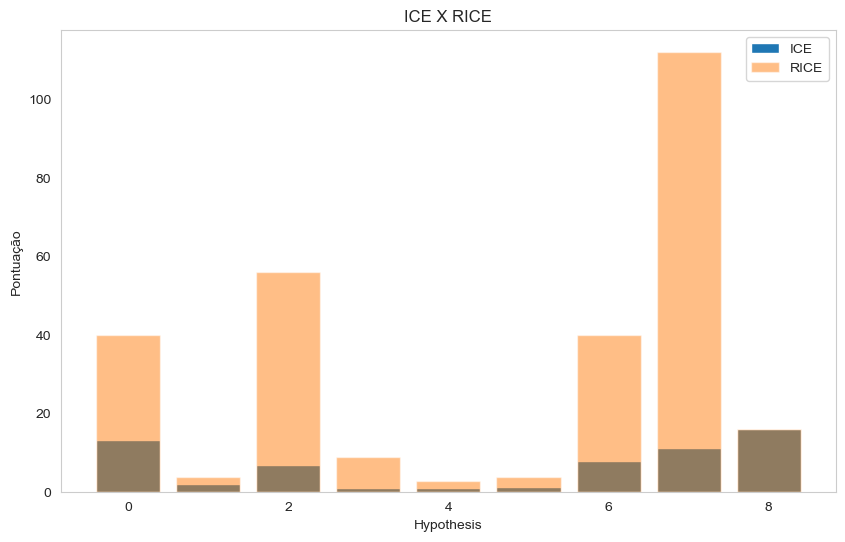

In [129]:
import matplotlib.pyplot as plt

# Criando o gráfico de barras com Matplotlib e removendo as linhas de grade
plt.figure(figsize=(10, 6))
plt.bar(hypotheses["Nº Hypothesis"], hypotheses["ICE"], label="ICE")
plt.bar(hypotheses["Nº Hypothesis"], hypotheses["RICE"], label="RICE", alpha=0.5)
plt.title("ICE X RICE")
plt.xlabel("Hypothesis")
plt.ylabel("Pontuação")
plt.legend()

# Removendo as linhas de grade
plt.grid(False)

plt.show()

Ambos os frameworks são úteis em diferentes situações, e a escolha do melhor framework para priorização dependerá do contexto específico e das necessidades da organização. Por exemplo, o RICE pode ser mais útil quando a empresa tem recursos limitados e precisa priorizar projetos com base em seu potencial de impacto, enquanto o ICE pode ser mais útil quando a empresa tem recursos disponíveis e precisa priorizar projetos com base em sua facilidade de implementação. Em resumo, a escolha do framework de priorização ideal dependerá do contexto e das necessidades específicas da organização em questão.

No projeto as hipóteses mais promissoras no framework ICE são: 8, 0, 7 e 6, já no Rice são: 7, 2, 0 e 6.

## <center><strong>ANÁLISE DE TESTE A/B:</strong>

In [88]:
display(orders.head(3))
display(visits.head(3))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


Fazendo uma pré verificação quanto aos outliers:

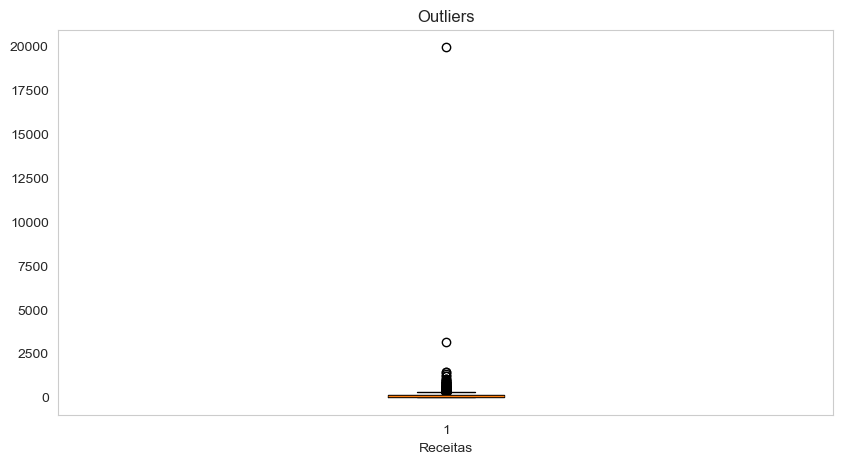

In [130]:
# Criando o gráfico de caixa com Matplotlib
plt.figure(figsize=(10, 5))
plt.boxplot(orders["revenue"])

# Removendo as linhas de grade
plt.grid(False)

# Definindo os rótulos dos eixos e o título do gráfico
plt.xlabel("Receitas")
plt.title("Outliers")

# Exibindo o gráfico
plt.show()

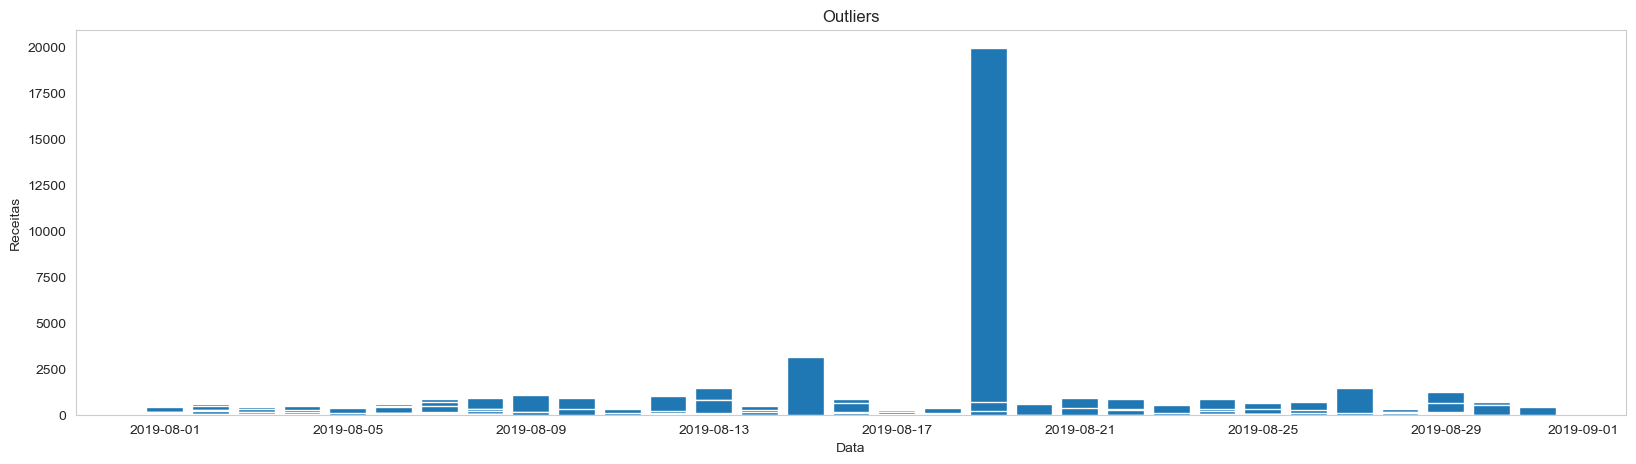

In [134]:
# Criando o gráfico de barras com Matplotlib
plt.figure(figsize=(20, 5))
plt.bar(orders["date"], orders["revenue"])

# Removendo as linhas de grade
plt.grid(False)

# Definindo os rótulos dos eixos e o título do gráfico
plt.xlabel("Data")
plt.ylabel("Receitas")
plt.title("Outliers")

# Exibindo o gráfico
plt.show()

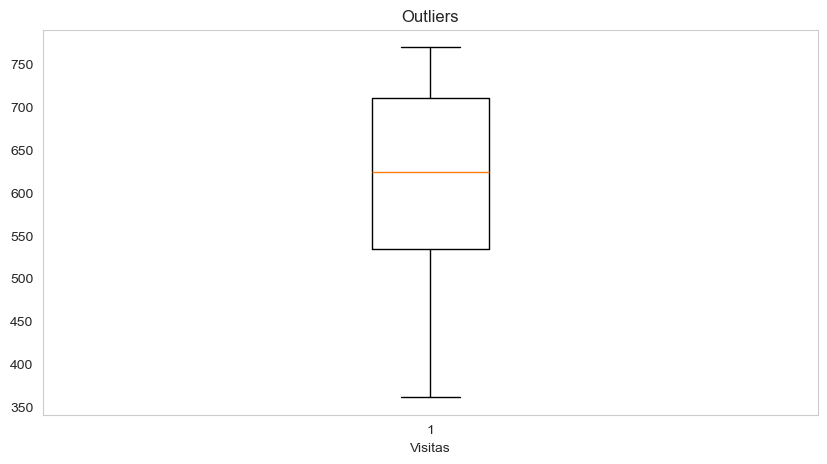

In [135]:
# Criando o gráfico de caixa com Matplotlib
plt.figure(figsize=(10, 5))
plt.boxplot(visits["visits"])

# Removendo as linhas de grade
plt.grid(False)

# Definindo os rótulos dos eixos e o título do gráfico
plt.xlabel("Visitas")
plt.title("Outliers")

# Exibindo o gráfico
plt.show()

### Gráficos da receita cumulativa diária e o grupo de teste A/B:


In [92]:
display(orders.head(3))
display(visits.head(3))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


In [93]:
# construindo um vetor com valores de pares unívocos de grupos de datas
datesGroups = orders[['date','group']].drop_duplicates()

In [94]:
# obtendo dados diários cumulativos agregados sobre pedidos 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])


In [95]:
# obtendo dados diários cumulativos agregados sobre visitantes  
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])


In [96]:
# juntando as duas tabelas em uma e dando nomes descritivos para suas colunas
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(65)) 

         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      26      22   2648.4       719
1  2019-08-01     B      19      18   1328.4       713
2  2019-08-02     A      47      40   4207.6      1338
3  2019-08-02     B      42      40   3896.5      1294
4  2019-08-03     A      72      65   6337.9      1845
..        ...   ...     ...     ...      ...       ...
57 2019-08-29     B     570     503  82371.9     17708
58 2019-08-30     A     573     481  68605.3     18037
59 2019-08-30     B     592     524  85694.5     18198
60 2019-08-31     A     588     490  69913.3     18736
61 2019-08-31     B     609     541  87482.2     18916

[62 rows x 6 columns]


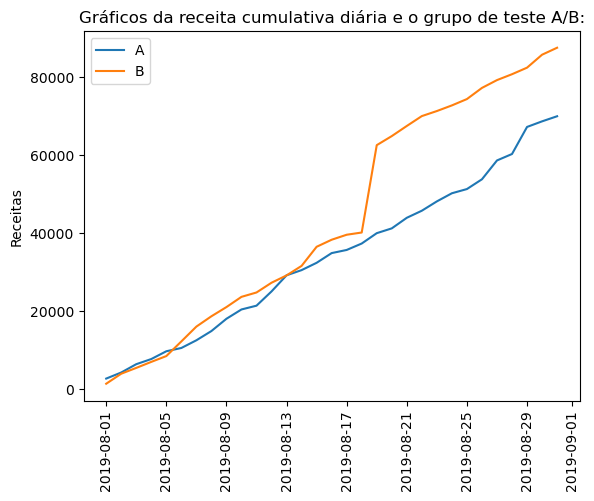

In [97]:
# DataFrame com pedidos cumulativos e receita cumulativa por dia, grupo A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame com pedidos cumulativos e receita cumulativa por dia, grupo B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# construindo o gráfico de receita do grupo A 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# construindo o gráfico de receita do grupo B 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Gráficos da receita cumulativa diária e o grupo de teste A/B:')
plt.ylabel('Receitas')


plt.xticks(rotation=90)

plt.legend();

A receita apresenta um crescimento estável ao longo de todo o teste.

Mesmo assim, podemos observar que o grupo B apresenta um pico de receita entre o dia 17 a 21/08. Isso ocorre devido a uma venda muito cara na amostra, que ocorreu no dia 19/08.


In [98]:
orders_total_receitas = orders.groupby('group')['revenue'].sum()
display(orders_total_receitas)

group
A    69913.3
B    87482.2
Name: revenue, dtype: float64

### Gráfico do volume médio de compra por grupo:

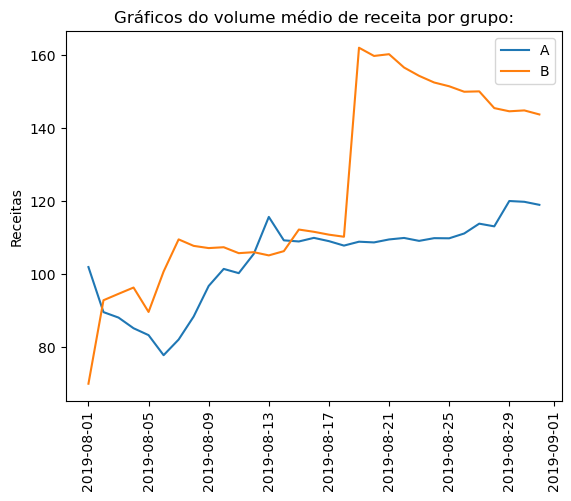

In [99]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('Gráficos do volume médio de receita por grupo:')
plt.ylabel('Receitas')
plt.xticks(rotation=90)
plt.legend();

As métricas cumulativas do grupo azul são consistentemente menores do que as do grupo laranja. Mais ou menos ao dia 13, há uma flutuação na conversão Após o dia 17 há um pico no grupo laranja devido aos outliers.

###  Gráfico de diferença relativa para os volumes médios de compras.

Para tornar mais óbvia a diferença entre os grupos, analistas constroem gráficos de diferença relativa. Cada um de seus pontos é calculado da seguinte forma: group B cumulative metric  / group A cumulative metric - 1.

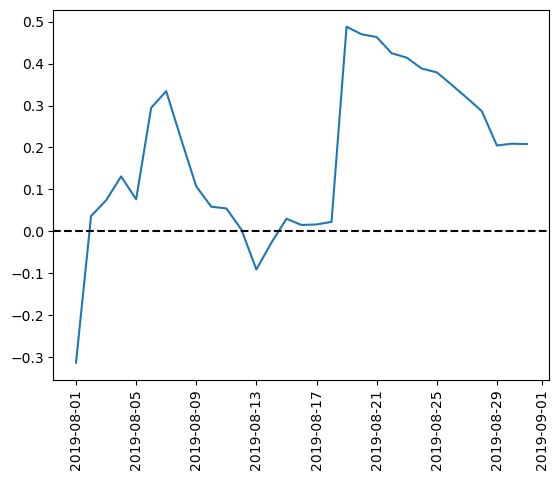

In [100]:
# reunindo os dados em um DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# construindo um gráfico de diferença relativa para os volumes médios de compra
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# acrescentando o eixo X
plt.axhline(y=0, color='black', linestyle='--') 


plt.xticks(rotation=90);

Em vários pontos a diferença entre os segmentos apresenta picos. Isso indica a ocorrência de pedidos grandes e valores atípicos

### Gráfico de conversão cumulativo:

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,26,22,2648.4,719,0.036161
1,2019-08-01,B,19,18,1328.4,713,0.026648
2,2019-08-02,A,47,40,4207.6,1338,0.035127
3,2019-08-02,B,42,40,3896.5,1294,0.032457
4,2019-08-03,A,72,65,6337.9,1845,0.039024
...,...,...,...,...,...,...,...
57,2019-08-29,B,570,503,82371.9,17708,0.032189
58,2019-08-30,A,573,481,68605.3,18037,0.031768
59,2019-08-30,B,592,524,85694.5,18198,0.032531
60,2019-08-31,A,588,490,69913.3,18736,0.031383


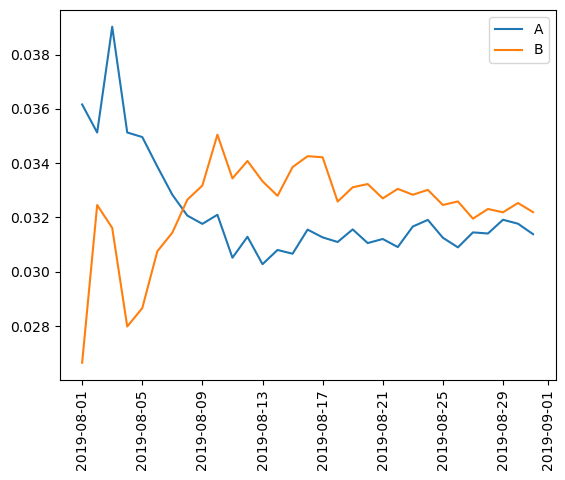

In [101]:
# calculando a conversão cumulativa
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
display(cumulativeData)
# selecionando dados no grupo A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# Selecionando dados no grupo B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# construindo os gráficos
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=90);

plt.legend();

In [102]:
cumulativeDataA_r = cumulativeDataA.groupby('group')['conversion'].mean()
display(cumulativeDataA_r)

cumulativeDataBt_r = cumulativeDataB.groupby('group')['conversion'].mean()
display(cumulativeDataBt_r)

group
A    0.032222
Name: conversion, dtype: float64

group
B    0.03236
Name: conversion, dtype: float64

### Gráfico da diferença relativa para as taxas de conversão cumulativas:

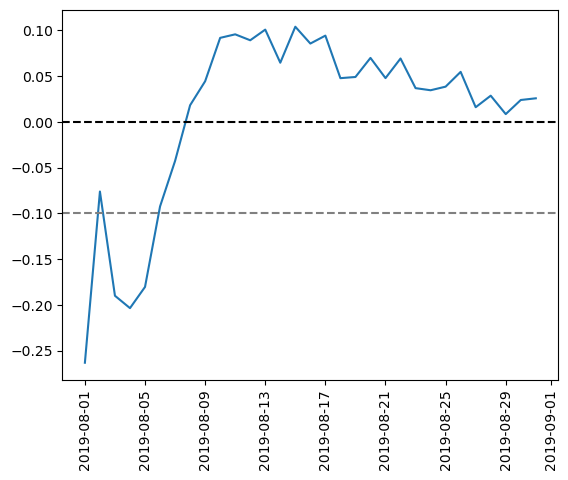

In [103]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)


plt.xticks(rotation=90);

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--');

No começo do teste, o grupo B estava claramente para trás, mas então, de repente, ele assumiu a liderança. E então sua conversão diminuiu e tem um pico.

De modo geral, a taxa de conversão ainda não é estável, então ainda é cedo para tirar conclusões sobre o teste. De qualquer modo, primeiro devemos observar as anomalias; elas podem chegar a alterar o quadro geral de alguma forma.

## <center><strong>VALORES EXTREMOS: VALORES ATÍPICOS E ANOMALIAS.

### Distribuição de preços de pedidos:

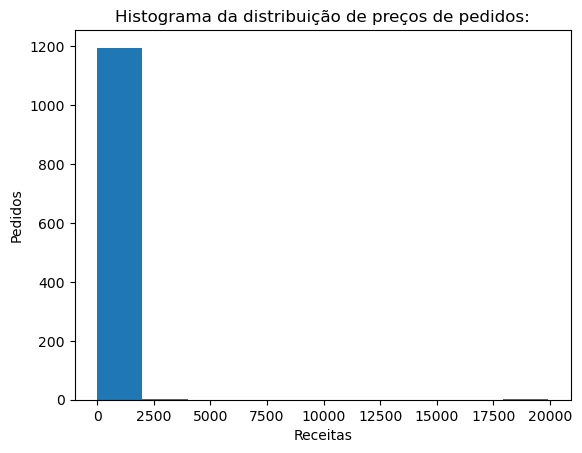

In [104]:
plt.hist(orders['revenue']);
plt.title('Histograma da distribuição de preços de pedidos:')
plt.xlabel('Receitas')
plt.ylabel('Pedidos');


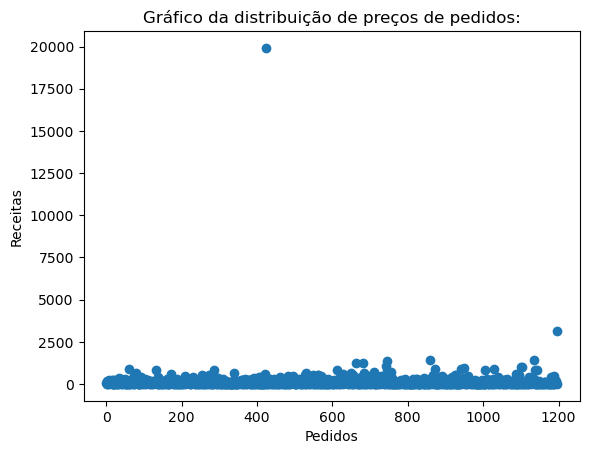

In [105]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);
plt.title('Gráfico da distribuição de preços de pedidos:')
plt.xlabel('Pedidos')
plt.ylabel('Receitas');

Os gráficos acima mostram que o valor da maioria dos pedidos foi menor que €2.500, porém temos outliers que podem distorcer os resultados e tornar o grupo em que esta colocado líder. 

### Calculo dos percentis:

In [106]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[282.48  435.54  900.904]


Menos de 5% dos pedidos possuem valores maiores do que €435,54 e menos de 1% custou mais do que €900,90.

### Quantidade de pedidos por usuário:

In [107]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


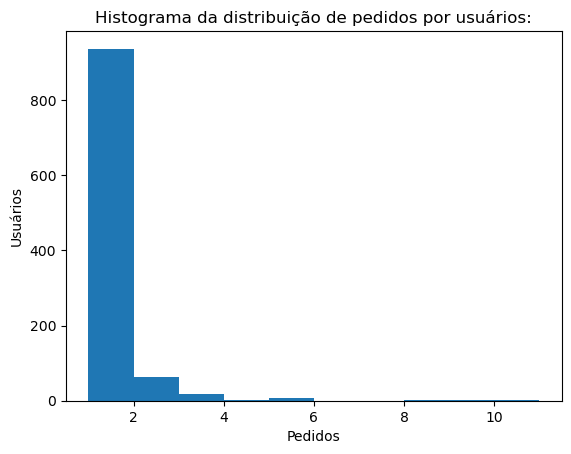

In [108]:
plt.hist(ordersByUsers['orders'])
plt.title('Histograma da distribuição de pedidos por usuários:')
plt.xlabel('Pedidos')
plt.ylabel('Usuários');

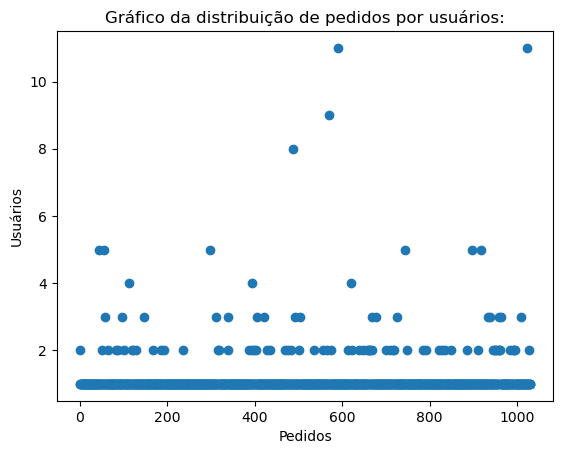

In [109]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Gráfico da distribuição de pedidos por usuários:')
plt.xlabel('Pedidos')
plt.ylabel('Usuários');

A maioria dos clientes realizou apenas um pedido.

### Calculo dos percentis:

In [110]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 2. 4.]


Menos de 5% dos usuários fez mais do que 2 pedidos, e 1% fez mais do que 4.

## <center><strong>ANÁLISE - PASSO A PASSO DE UM TESTE A/B

### Calculo  da significância estatística da diferença na conversão entre os grupos:

In [111]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']


ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

In [112]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.154
0.026


Hipotese nula: Não há diferença estatística significativa na conversão entre os grupos A e B.

Hipotese alternativa: Há diferença estatística significativa na conversão entre os grupos A e B.

A primeira linha do resultado nos dá o valor-p, 0,154, que é maior que 0,05. Então, não podemos rejeitar a hipótese nula de que não há diferença estatística significativa na conversão entre os grupos. 

A taxa de conversão da variante B foi 2,60% maior que a taxa de conversão da variante A. No entanto, não é possível dizer, com 95% de confiança, que o desempenho da variante B será melhor que o da variante A.

### Diferença relativa em volume médio de pedidos entre os grupos:

In [113]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.931
0.208


Hipotese nula: Não há diferença no volume médio de pedidos entre os grupos A e B.

Hipotese alternativa: Há diferença no volume médio de pedidos entre os grupos A e B.



O valor-p é consideravelmente maior do que 0.05, então não há motivo para rejeitar a hipótese nula e concluir que o volume médio de pedidos seria diferente entre os grupos. Apesar disso, o volume médio de pedidos do grupo B é muito maior do que o do grupo A (20,80%).

### Quantidade total de usuários anômalos:

In [114]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 435]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(30))
print(abnormalUsers.shape)

1099     148427295
18       199603092
928      204675465
23       237748145
33       249864742
684      358944393
648      382846391
50       393266494
62       457167155
66       611059232
751      689129267
1137     759473111
77       787824685
654      816783716
339      834731816
949      887908475
744      888512513
563      935349363
709      950626008
1103    1164614297
137     1211585711
144     1230306981
148     1294878855
1136    1307669133
858     1316129916
421     1357170471
549     1367935136
179     1404934699
562     1452540367
1121    1604853044
dtype: int64
(84,)


Temos 84 usuários anômalos no total, são aqueles que realizam mais do que 2 pedidos ou um pedido maior do que $435.


### Calculo da significância estatística das diferenças em conversão entre os grupos, usando dados filtrados.

In [115]:
# vamos preparar amostras da quantidade total de pedidos para cada grupo de teste:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [116]:
# Vamos aplicar o critério estatístico Mann-Whitney às amostras resultantes:

print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.132
0.041


Hipotese nula: Não há diferença estatística significativa na conversão entre os grupos A e B.

Hipotese alternativa: Há diferença estatística significativa na conversão entre os grupos A e B.

A primeira linha do resultado nos dá o valor-p, 0,132, que é maior que 0,05. Então, não podemos rejeitar a hipótese nula de que não há diferença estatística significativa na conversão entre os grupos. 

A taxa de conversão da variante B foi 4,60%  maior que a taxa de conversão da variante A.

Os resultados relativos à conversão quase não mudaram. Vamos ver o que acontece com os valores para volume médio de pedidos:

In [117]:
# Vamos ver o que acontece com os valores para volume médio de pedidos:
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.735
-0.032


Hipotese nula: Não há diferença no volume médio de pedidos entre os grupos A e B.

Hipotese alternativa: Há diferença no volume médio de pedidos entre os grupos A e B.



O valor-p é consideravelmente maior do que 0.05, então não há motivo para rejeitar a hipótese nula e concluir que o volume médio de pedidos seria diferente entre os grupos. Apesar disso, o volume médio de pedidos do grupo B é maior do que o do grupo A (3,20%).

Este resultado demonstra claramente como anomalias podem afetar resultados de testes A/B.


### Gráficos após retirar os outliers:

In [118]:
order_sem_outleirs = orders[~orders['visitorId'].isin(abnormalUsers)]
datesGroups = order_sem_outleirs[['date','group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: order_sem_outleirs[np.logical_and(order_sem_outleirs['date'] <= x['date'], order_sem_outleirs['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


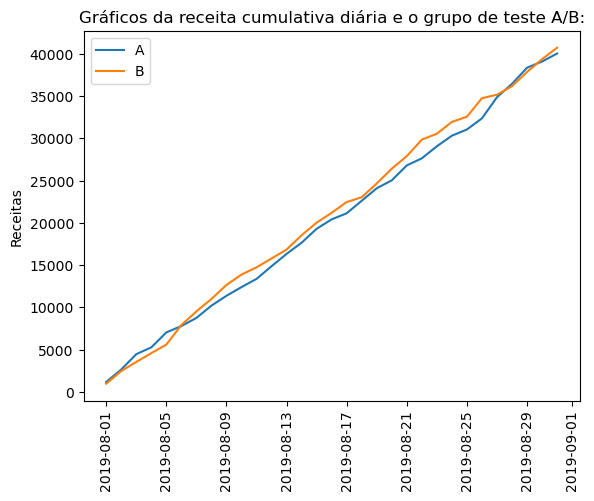

In [119]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Gráficos da receita cumulativa diária e o grupo de teste A/B:')
plt.ylabel('Receitas')
plt.xticks(rotation=90)
plt.legend();

A receita apresenta um crescimento estável ao longo de todo o teste.

Podemos observar agora que o grupo B não apresenta mais um pico de receita devido a uma venda com um valor muito elevado na amostra, que ocorreu no dia 19/08, e as receitas tem valores bem parecidos, sendo o grupo B pouca coisa melhor.

Total de receitas sem outliers: Grupo A: 40.043,80€ / Grupo B: 40.730,30€

In [120]:
total_sem_out = order_sem_outleirs.groupby('group')['revenue'].sum()
display(total_sem_out)

group
A    40043.8
B    40730.3
Name: revenue, dtype: float64

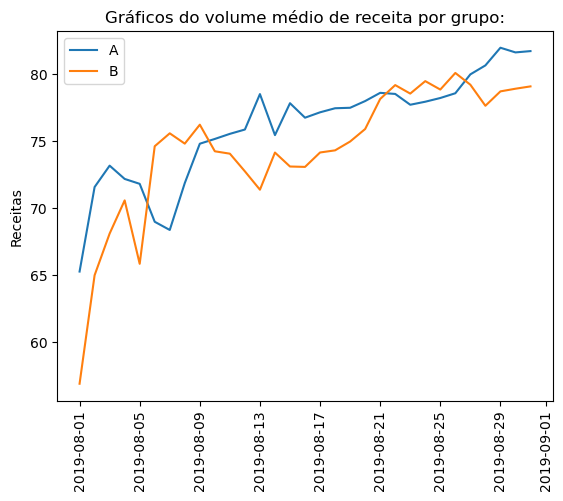

In [121]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Gráficos do volume médio de receita por grupo:')
plt.ylabel('Receitas')
plt.xticks(rotation=90)
plt.legend();

Diferente do que haviamos visto anteriormente, os valores das métricas flutuam entre si e não há mais picos, existem diferenças entre os volumes médios de receita por grupo, mas não são exorbitantes.

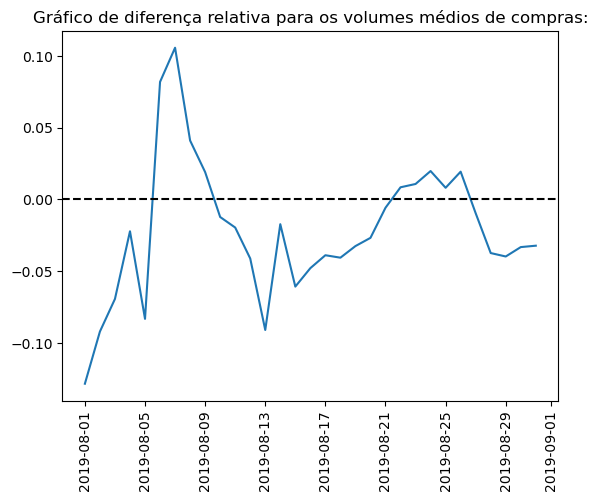

In [122]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Gráfico de diferença relativa para os volumes médios de compras:')
plt.xticks(rotation=90);

A diferença relativa para os volumes médios de compra que chegava a 48,82% no gráfico com os outliers não passa de 10.55% aqui.

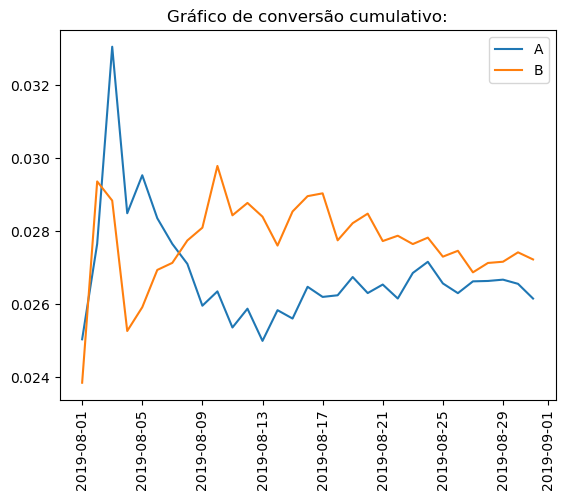

In [123]:
# calculando a conversão cumulativa
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# selecionando dados no grupo A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# Selecionando dados no grupo B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# construindo os gráficos
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=90);
plt.title('Gráfico de conversão cumulativo:')
plt.legend();

O grupo B começa convertendo menos mas acaba passando o grupo A.

In [124]:
cumulativeDataAt = cumulativeDataA.groupby('group')['conversion'].mean()
display(cumulativeDataAt)

cumulativeDataBt = cumulativeDataB.groupby('group')['conversion'].mean()
display(cumulativeDataBt)



group
A    0.026808
Name: conversion, dtype: float64

group
B    0.027703
Name: conversion, dtype: float64

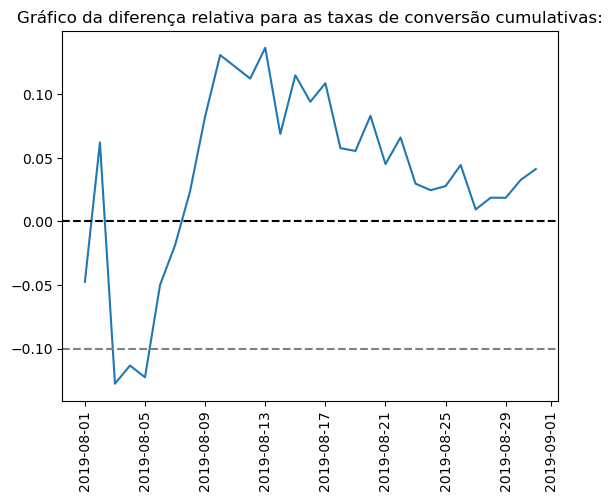

In [125]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title('Gráfico da diferença relativa para as taxas de conversão cumulativas:')
plt.xticks(rotation=90);
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--');

Do mesmo modo que no gráfico com outliers, no inicio do teste o grupo B estava para trás, e entre os dias 09 e 13/08, ele assumiu a liderança.

De modo geral, a taxa de conversão ainda não é estável e esta diminuindo ao passar do tempo.

## <center><strong> CONCLUSÃO:

Com base nos resultados, a possível decisão a ser tomada seria a de parar o teste e seguir outros caminhos, pois a diferença entre os grupos depois de retirarmos os outliers é baixa, sendo que o grupo B se destaca por pouco.

* <strong> Receitas totais dos grupo com os dados brutos: </strong>


Grupo A:   69.913,30€

Grupo B:   87.482,20€


* <strong> Receitas totais dos grupo sem outliers: </strong>

Grupo A:    40.043,80€

Grupo B:    40.730,30€

As médias de conversões também são bem parecidas com outliers ou sem.

Podemos comparar os gráficos das análises feitas no trabalho acima:
    
Do lado direito temos os gráficos com os dados brutos, e do lado esquerdo sem os outliers:


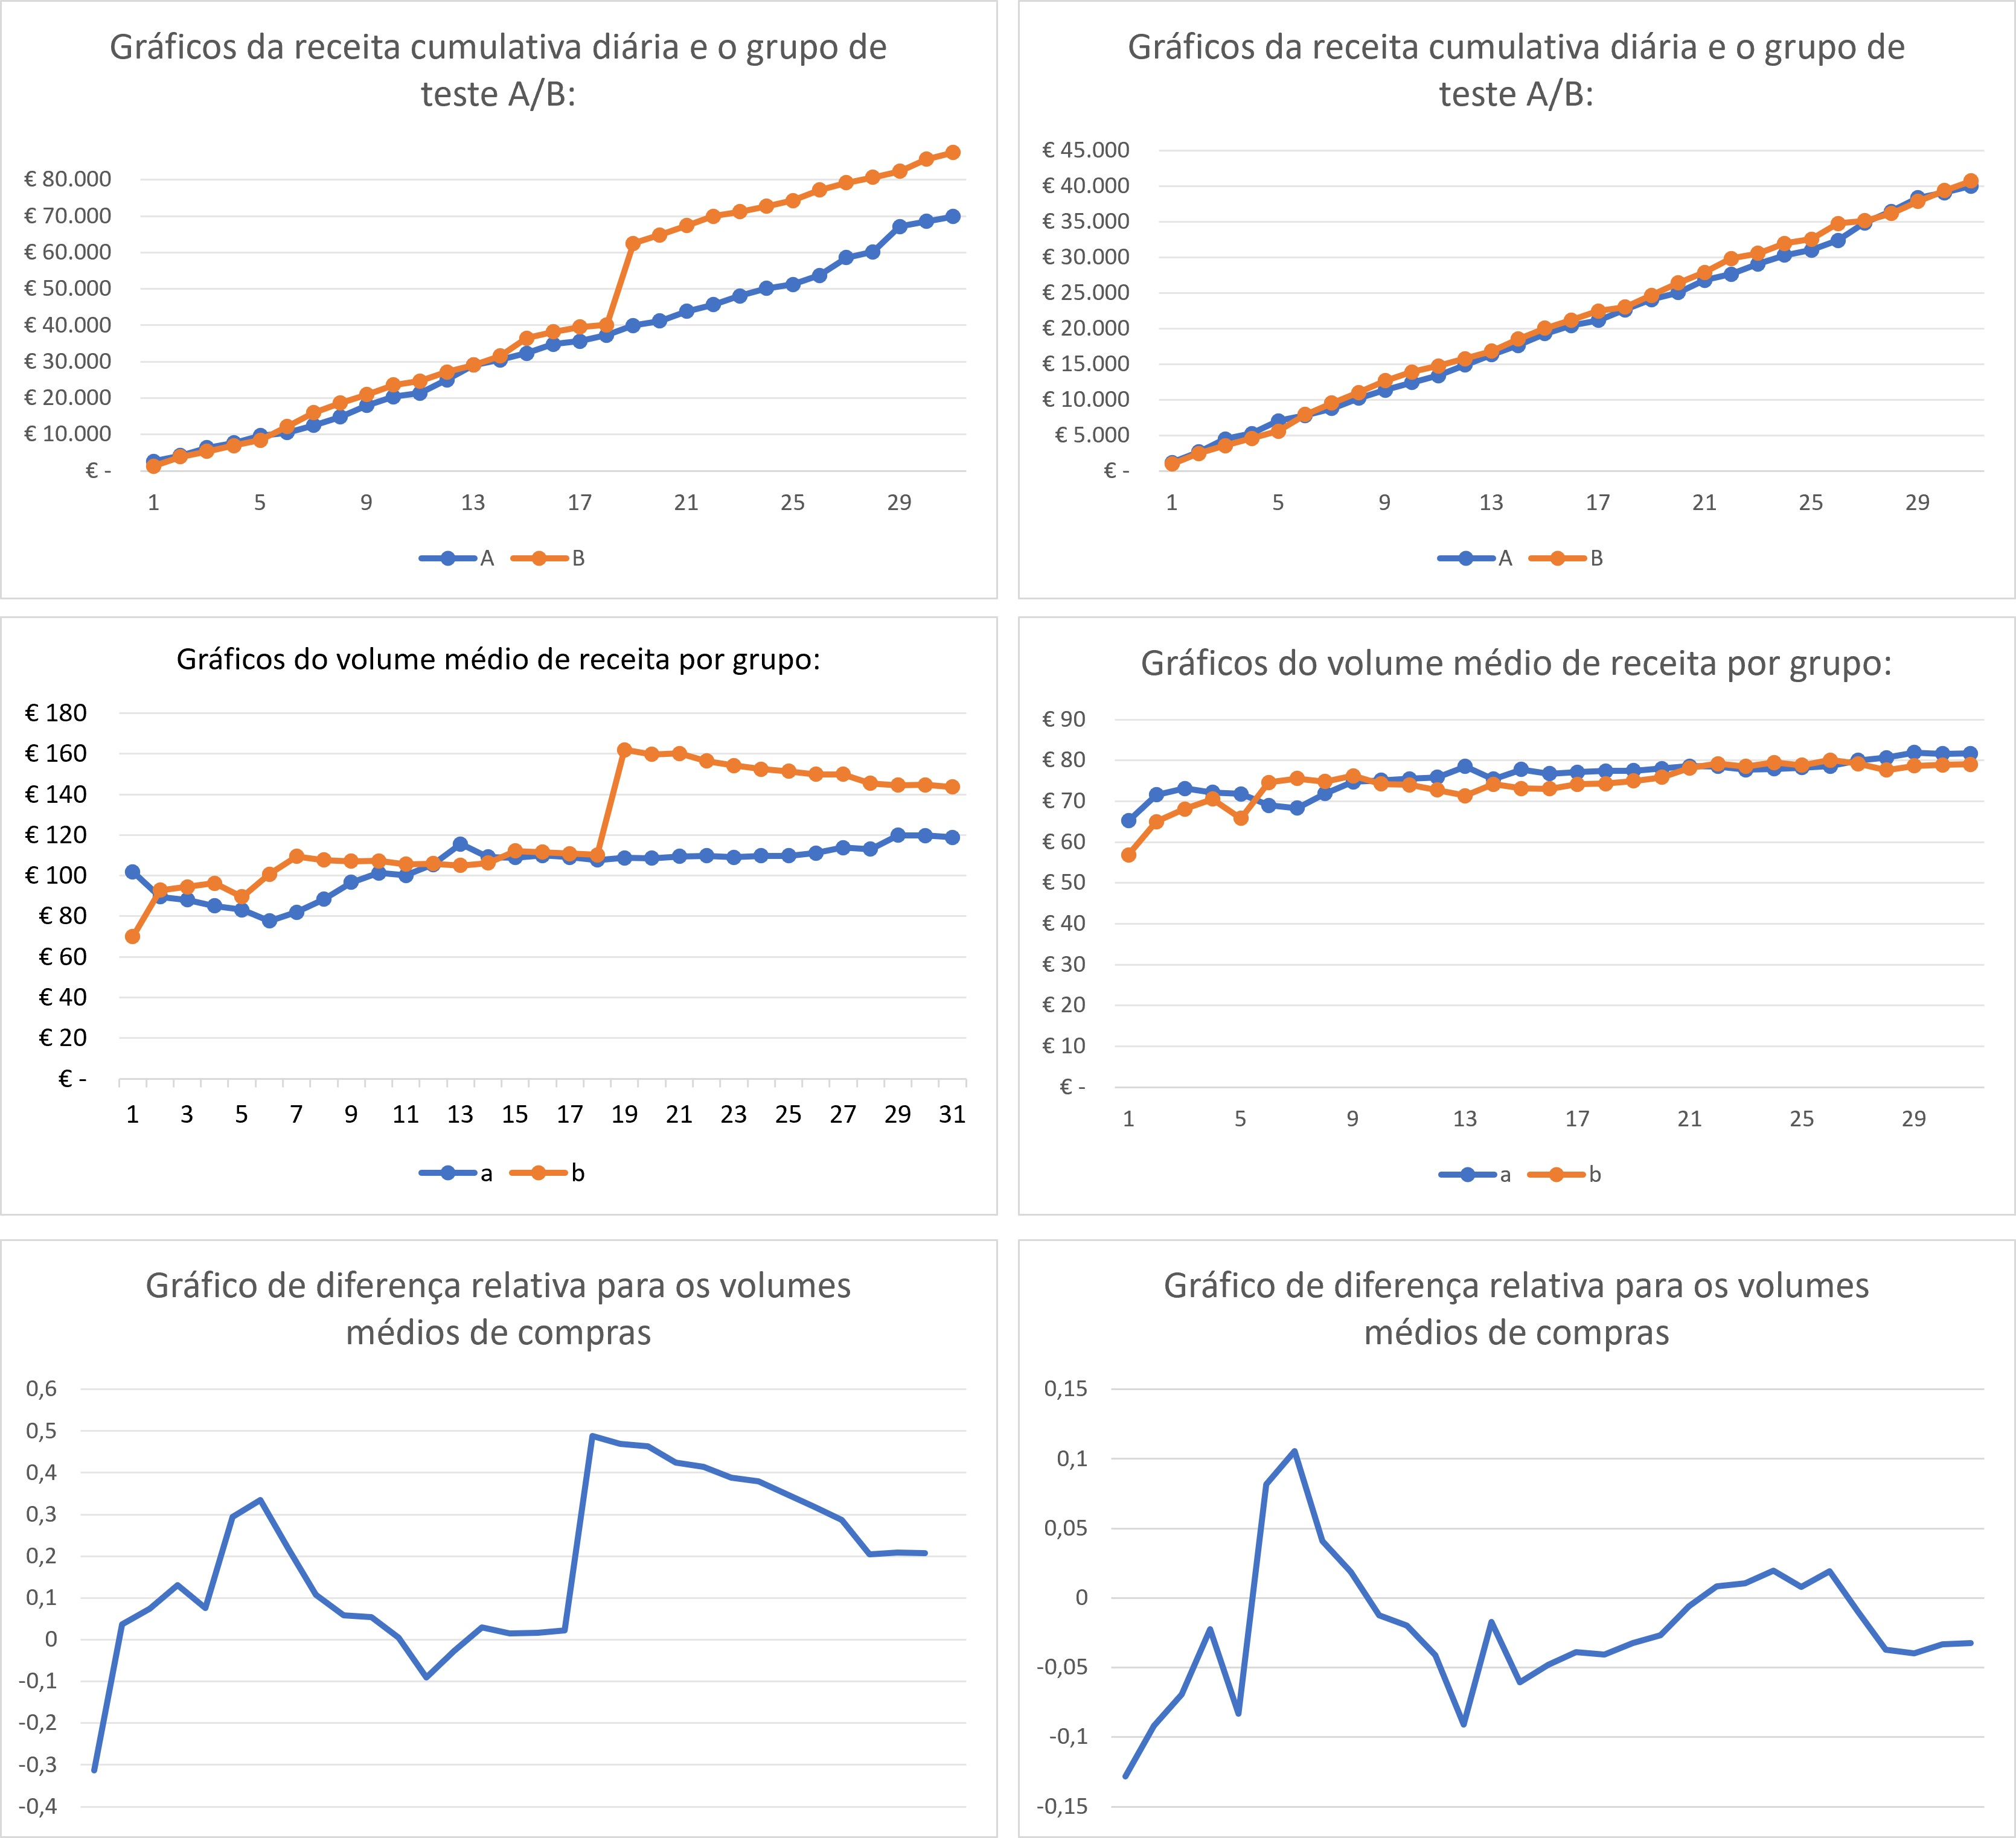

In [126]:
from IPython.display import Image
img_path = 'Imagem2.jpg'
img = Image(filename=img_path)

display(img)